In [1]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import sklearn.metrics as metrics
import warnings

In [2]:
adnimerge = pd.read_csv('data-CNvsAD.csv') # Read all data
adnimerge.head()

,RID,Label,Visit_Code,RBM Sample ID,Sample_Received_Date,Alpha-1-Microglobulin (A1Micro) (ug/ml),Alpha-2-Macroglobulin (A2Macro) (mg/mL),Alpha-1-Antichymotrypsin (AACT) (ug/ml),Alpha-1-Antitrypsin (AAT) (mg/mL),Angiotensin-Converting Enzyme (ACE) (ng/ml),...,Thrombopoietin (ng/mL),TNF-Related Apoptosis-Inducing Ligand Re (ng/mL),Serotransferrin (Transferrin) (mg/dl),Thyroid-Stimulating Hormone (TSH) (uIU/mL),Transthyretin (TTR) (mg/dl),Vascular Cell Adhesion Molecule-1 (VCAM- (ng/mL),Vascular Endothelial Growth Factor (VEGF (pg/mL),Vitronectin (ug/ml),Vitamin K-Dependent Protein S (VKDPS) (ug/ml),von Willebrand Factor (vWF) (ug/mL)
0,3,AD,bl,KA8000CL-02,13-Sep-05,1.17609,0.07918,2.33445,0.44716,2.00432,...,1.3,1.34242,3.41330,0.55630,2.68305,2.98722,2.97035,2.96379,1.23045,1.14613
1,8,CN,bl,GA8000D4-02,20-Sep-05,0.97313,0.27875,3.12710,0.50515,1.97772,...,2.1,0.75587,3.46982,0.32222,2.67943,2.86153,2.81954,2.88986,1.41497,1.89763
2,8,CN,m12,HA803FG6-02,21-Sep-06,0.94448,0.07918,3.16137,0.49136,1.96848,...,3.4,0.69897,3.37475,0.44716,2.50651,2.88423,2.87099,2.97081,1.41497,1.83251
3,10,AD,bl,AA80013M-03,11-Nov-05,1.14613,0.07918,2.41664,0.38021,2.10721,...,1.3,1.23045,3.35984,0.41497,2.40654,2.88024,2.74741,2.88536,1.23045,1.51851
4,14,CN,bl,BA802V7G-02,7-Nov-05,1.00000,0.07918,2.52244,0.47712,1.93952,...,1.0,1.14613,3.41830,0.07918,2.68124,2.68124,2.73400,2.90526,1.30103,1.77815


In [3]:
adnimerge['Label'].value_counts() # Review target distribution again

CN    112
AD    112
Name: Label, dtype: int64

In [4]:
# View all data sizes
adnimerge.shape

(224, 151)

In [5]:
# Missing value count
for col in adnimerge.columns:
    print(col, adnimerge[col].isnull().sum())

RID 0
Label 0
Visit_Code 0
RBM Sample ID 0
Sample_Received_Date 0
Alpha-1-Microglobulin (A1Micro) (ug/ml) 0
Alpha-2-Macroglobulin (A2Macro) (mg/mL) 0
Alpha-1-Antichymotrypsin (AACT) (ug/ml) 0
Alpha-1-Antitrypsin (AAT) (mg/mL) 0
Angiotensin-Converting Enzyme (ACE) (ng/ml) 0
Adiponectin (ug/mL) 0
Alpha-Fetoprotein (AFP) (ng/mL) 0
Agouti-Related Protein (AGRP) (pg/mL) 0
Angiopoietin-2 (ANG-2) (ng/mL) 0
Angiotensinogen (ng/mL) 0
Apolipoprotein A-I (Apo A-I) (mg/mL) 0
Apolipoprotein A-II (Apo A-II) (ng/ml) 0
Apolipoprotein A-IV (Apo A-IV) (ug/ml) 0
Apolipoprotein B (Apo B) (ug/ml) 0
Apolipoprotein C-I (Apo C-I) (ng/ml) 0
Apolipoprotein C-III (Apo C-III) (ug/mL) 0
Apolipoprotein D (Apo D) (ug/ml) 0
Apolipoprotein E (Apo E) (ug/ml) 0
Apolipoprotein H (Apo H) (ug/mL) 0
AXL Receptor Tyrosine Kinase (AXL) (ng/mL) 0
Beta-2-Microglobulin (B2M) (ug/mL) 0
Brain-Derived Neurotrophic Factor (BDNF) (ng/mL) 0
B Lymphocyte Chemoattractant (BLC) (pg/ml) 0
Bone Morphogenetic Protein 6 (BMP-6) (ng/mL) 0
Bra

In [6]:
#Longitudinal Protein Panel
data=adnimerge[['Label','Alpha-2-Macroglobulin (A2Macro) (mg/mL)','Apolipoprotein E (Apo E) (ug/ml)','Brain Natriuretic Peptide  (BNP) (pg/ml)',
                'Eotaxin-3 (pg/mL)','Receptor for advanced glycosylation end (ng/mL)','Serum Glutamic Oxaloacetic Transaminase (ug/mL)',
                'Pregnancy-Associated Plasma Protein A (P (mIU/mL)','Apolipoprotein H (Apo H) (ug/mL)','Complement C3 (C3) (mg/mL)','Insulin-like Growth Factor-Binding Prote (ng/mL)',
                'Interleukin-3 (IL-3) (ng/mL)','Pancreatic Polypeptide (PPP) (pg/ml)','Cortisol (Cortisol) (ng/ml)'
               ]]

data

,Label,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Insulin-like Growth Factor-Binding Prote (ng/mL),Interleukin-3 (IL-3) (ng/mL),Pancreatic Polypeptide (PPP) (pg/ml),Cortisol (Cortisol) (ng/ml)
0,AD,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,1.93952,-1.65758,2.50106,2.13033
1,CN,0.27875,2.06819,2.89818,2.74586,0.60206,4.3,-2.25964,374,0.25527,1.94939,-1.92082,2.55751,2.14922
2,CN,0.07918,2.06819,2.95182,2.67117,0.81291,7.1,-1.74473,341,0.25527,2.59770,-2.40894,1.80618,2.32428
3,AD,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.81291,-1.43180,1.69020,2.06446
4,CN,0.07918,1.86332,2.40483,2.33646,0.69897,3.0,-1.55284,340,0.30103,1.77085,-2.04576,2.05308,2.06819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,AD,-0.02687,1.69020,3.28330,2.61700,0.04139,3.1,-1.55284,347,0.17609,2.04139,-1.15490,1.77815,2.27184
220,AD,0.07918,1.83885,2.87390,2.68931,0.74036,2.8,-2.26761,350,0.25527,1.98227,-1.31876,1.67210,2.13033
221,AD,-0.05061,1.87506,2.96895,2.89597,0.74036,3.7,-2.25964,338,0.17609,2.01284,-1.67778,1.69020,2.43136
222,AD,-0.07572,1.79239,2.60959,2.27184,0.91908,2.5,-1.55284,351,0.23045,2.07188,-1.61979,2.19033,2.45025


In [7]:
cols_with_na=[]

for column in data:
    if data[column].isnull().any()==True:
        cols_with_na.append(column)

# Average Fill
meandf = data.copy()
for col in cols_with_na:
    if data[col].dtype=='float64':
        meandf[col] = data[col].fillna(data[col].mean())
    else: #For non numeric data
        meandf[col] = data[col].fillna(data[col].mode()[0])
        
np.any(pd.isnull(meandf)) # If `False`，Confirm that Meandf currently has no Nan

False

In [8]:
meandf.head()

,Label,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Insulin-like Growth Factor-Binding Prote (ng/mL),Interleukin-3 (IL-3) (ng/mL),Pancreatic Polypeptide (PPP) (pg/ml),Cortisol (Cortisol) (ng/ml)
0,AD,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,1.93952,-1.65758,2.50106,2.13033
1,CN,0.27875,2.06819,2.89818,2.74586,0.60206,4.3,-2.25964,374,0.25527,1.94939,-1.92082,2.55751,2.14922
2,CN,0.07918,2.06819,2.95182,2.67117,0.81291,7.1,-1.74473,341,0.25527,2.59770,-2.40894,1.80618,2.32428
3,AD,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.81291,-1.43180,1.69020,2.06446
4,CN,0.07918,1.86332,2.40483,2.33646,0.69897,3.0,-1.55284,340,0.30103,1.77085,-2.04576,2.05308,2.06819


In [9]:
# Map and encode the target
mapping = {
           'CN': 0,
           'AD': 1
}
meandf['Label'] =meandf['Label'].map(mapping)
meandf.head()

,Label,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Insulin-like Growth Factor-Binding Prote (ng/mL),Interleukin-3 (IL-3) (ng/mL),Pancreatic Polypeptide (PPP) (pg/ml),Cortisol (Cortisol) (ng/ml)
0,1,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,1.93952,-1.65758,2.50106,2.13033
1,0,0.27875,2.06819,2.89818,2.74586,0.60206,4.3,-2.25964,374,0.25527,1.94939,-1.92082,2.55751,2.14922
2,0,0.07918,2.06819,2.95182,2.67117,0.81291,7.1,-1.74473,341,0.25527,2.59770,-2.40894,1.80618,2.32428
3,1,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.81291,-1.43180,1.69020,2.06446
4,0,0.07918,1.86332,2.40483,2.33646,0.69897,3.0,-1.55284,340,0.30103,1.77085,-2.04576,2.05308,2.06819


In [10]:
meandf.isnull().sum()

Label                                                0
Alpha-2-Macroglobulin (A2Macro) (mg/mL)              0
Apolipoprotein E (Apo E) (ug/ml)                     0
Brain Natriuretic Peptide  (BNP) (pg/ml)             0
Eotaxin-3 (pg/mL)                                    0
Receptor for advanced glycosylation end (ng/mL)      0
Serum Glutamic Oxaloacetic Transaminase (ug/mL)      0
Pregnancy-Associated Plasma Protein A (P (mIU/mL)    0
Apolipoprotein H (Apo H) (ug/mL)                     0
Complement C3 (C3) (mg/mL)                           0
Insulin-like Growth Factor-Binding Prote (ng/mL)     0
Interleukin-3 (IL-3) (ng/mL)                         0
Pancreatic Polypeptide (PPP) (pg/ml)                 0
Cortisol (Cortisol) (ng/ml)                          0
dtype: int64

In [11]:
X=meandf.drop(['Label'],axis=1)#Separate non data information such as RID, tags, and testing time
y=meandf['Label']#Label information
X

,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Insulin-like Growth Factor-Binding Prote (ng/mL),Interleukin-3 (IL-3) (ng/mL),Pancreatic Polypeptide (PPP) (pg/ml),Cortisol (Cortisol) (ng/ml)
0,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,1.93952,-1.65758,2.50106,2.13033
1,0.27875,2.06819,2.89818,2.74586,0.60206,4.3,-2.25964,374,0.25527,1.94939,-1.92082,2.55751,2.14922
2,0.07918,2.06819,2.95182,2.67117,0.81291,7.1,-1.74473,341,0.25527,2.59770,-2.40894,1.80618,2.32428
3,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.81291,-1.43180,1.69020,2.06446
4,0.07918,1.86332,2.40483,2.33646,0.69897,3.0,-1.55284,340,0.30103,1.77085,-2.04576,2.05308,2.06819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,-0.02687,1.69020,3.28330,2.61700,0.04139,3.1,-1.55284,347,0.17609,2.04139,-1.15490,1.77815,2.27184
220,0.07918,1.83885,2.87390,2.68931,0.74036,2.8,-2.26761,350,0.25527,1.98227,-1.31876,1.67210,2.13033
221,-0.05061,1.87506,2.96895,2.89597,0.74036,3.7,-2.25964,338,0.17609,2.01284,-1.67778,1.69020,2.43136
222,-0.07572,1.79239,2.60959,2.27184,0.91908,2.5,-1.55284,351,0.23045,2.07188,-1.61979,2.19033,2.45025


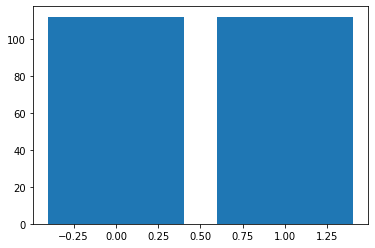

In [12]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

In [13]:
#Feature scaling, normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
def false_positive_rate(y_true, y_pred):

    # false positive
    fp = ((y_pred == 1) & (y_true == 0)).sum()

    # true negative
    tn = ((y_pred == 0) & (y_true == 0)).sum()

    # false positive rate
    return fp / (fp + tn)

In [17]:
#catboost
from catboost import CatBoostClassifier#Catboost ensemble learning classifier

model_CB = CatBoostClassifier(iterations=1000,learning_rate=0.1,max_depth=7,verbose=100,
                                      early_stopping_rounds=500,task_type='GPU',eval_metric='AUC',
                                      )

In [18]:
#交叉验证 catboost
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.pipeline import Pipeline
scoring = {'acc': 'accuracy',
           'precison': 'precision_macro',
           'recall': 'recall_macro',
           'F1-scores': 'f1_macro',
           'false_positive_rate': make_scorer(false_positive_rate),
           'AUC': 'roc_auc'}

pipeline = Pipeline([('transformer', sc), ('estimator', model_CB)])

scores = cross_validate(pipeline, X, y, scoring=scoring,
                         cv=kf, return_train_score=True)

print(scores.keys())
print("accuracy:",scores['test_acc'].mean())  
print("precison:",scores['test_precison'].mean())
print("recall:",scores['test_recall'].mean())
print("F1-scores:",scores['test_F1-scores'].mean())
print("test_false_positive_rate:",scores['test_false_positive_rate'].mean()) 
print("AUC:",scores['test_AUC'].mean())

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 31.6ms	remaining: 31.6s
100:	total: 3.03s	remaining: 26.9s
200:	total: 6.05s	remaining: 24s
300:	total: 9.03s	remaining: 21s
400:	total: 12.1s	remaining: 18s
500:	total: 15.1s	remaining: 15s
600:	total: 18.3s	remaining: 12.1s
700:	total: 21.5s	remaining: 9.18s
800:	total: 24.8s	remaining: 6.17s
900:	total: 28.1s	remaining: 3.09s
999:	total: 31.2s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 36.9ms	remaining: 36.8s
100:	total: 3.17s	remaining: 28.2s
200:	total: 6.16s	remaining: 24.5s
300:	total: 9.14s	remaining: 21.2s
400:	total: 12.1s	remaining: 18.1s
500:	total: 15.1s	remaining: 15.1s
600:	total: 18.1s	remaining: 12s
700:	total: 21.2s	remaining: 9.03s
800:	total: 24.2s	remaining: 6.01s
900:	total: 27.2s	remaining: 2.99s
999:	total: 30.2s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 30ms	remaining: 30s
100:	total: 3.03s	remaining: 27s
200:	total: 6.11s	remaining: 24.3s
300:	total: 9.24s	remaining: 21.5s
400:	total: 12.3s	remaining: 18.4s
500:	total: 15.5s	remaining: 15.4s
600:	total: 18.6s	remaining: 12.4s
700:	total: 21.7s	remaining: 9.28s
800:	total: 24.9s	remaining: 6.18s
900:	total: 28s	remaining: 3.08s
999:	total: 31.1s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 32.6ms	remaining: 32.5s
100:	total: 3.17s	remaining: 28.3s
200:	total: 6.46s	remaining: 25.7s
300:	total: 9.66s	remaining: 22.4s
400:	total: 12.8s	remaining: 19.2s
500:	total: 16.1s	remaining: 16.1s
600:	total: 19.6s	remaining: 13s
700:	total: 22.9s	remaining: 9.78s
800:	total: 26.3s	remaining: 6.54s
900:	total: 29.6s	remaining: 3.25s
999:	total: 32.8s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 32.3ms	remaining: 32.3s
100:	total: 3.24s	remaining: 28.8s
200:	total: 6.94s	remaining: 27.6s
300:	total: 10.4s	remaining: 24.2s
400:	total: 13.8s	remaining: 20.6s
500:	total: 17.1s	remaining: 17.1s
600:	total: 20.4s	remaining: 13.6s
700:	total: 23.7s	remaining: 10.1s
800:	total: 27s	remaining: 6.7s
900:	total: 30.3s	remaining: 3.32s
999:	total: 33.5s	remaining: 0us
dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precison', 'train_precison', 'test_recall', 'train_recall', 'test_F1-scores', 'train_F1-scores', 'test_false_positive_rate', 'train_false_positive_rate', 'test_AUC', 'train_AUC'])
accuracy: 0.8433333333333334
precison: 0.8457447464815886
recall: 0.839271351455562
F1-scores: 0.8401108880740432
test_false_positive_rate: 0.13063273568536726
AUC: 0.9331947818263607
